In [27]:
pip install -U pandasql

Note: you may need to restart the kernel to use updated packages.


# Objectives

To perform EDA on the datasets and find:
1. What is the average salary of employees by department?
2. Which department has the highest number of employees?
3. What is the distribution of gender in the company?
4. Is there a correlation between years of experience and salary?
6. Which department has the highest average salary?
7. Other insights

# Overview of the Process Used

1. Used two different linked employee datasets from Kaggle, 
2. Formed a data frame required specifically for the first 6 objectives,
3. Used SQL queries using pandasql library to find required results
4. Used various plots to get good Visual Insights from the data

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandasql as psql

In [29]:
df1=pd.read_csv("C:/Users/User/Downloads/Employee_Salary_Dataset.csv")
df1

,ID,Experience_Years,Age,Gender,Salary
0,1,5,28,Female,250000
1,2,1,21,Male,50000
2,3,3,23,Female,170000
3,4,2,22,Male,25000
4,5,1,17,Male,10000
5,6,25,62,Male,5001000
6,7,19,54,Female,800000
7,8,2,21,Female,9000
8,9,10,36,Female,61500
9,10,15,54,Female,650000


In [30]:
df2=pd.read_csv("C:/Users/User/Downloads/Department_Dataset.csv")
df2

,ID,Dept_name,location,travel_required
0,1,HR,Pune,yes
1,2,Finance,Bangalore,no
2,3,Finance,Bangalore,no
3,4,Finance,Pune,no
4,5,Tech,Mumbai,no
5,6,Tech,Pune,no
6,7,Tech,Bangalore,yes
7,8,HR,Bangalore,no
8,9,HR,Pune,no
9,10,HR,Pune,no


In [31]:
df3=df1.merge(df2)
df3

,ID,Experience_Years,Age,Gender,Salary,Dept_name,location,travel_required
0,1,5,28,Female,250000,HR,Pune,yes
1,2,1,21,Male,50000,Finance,Bangalore,no
2,3,3,23,Female,170000,Finance,Bangalore,no
3,4,2,22,Male,25000,Finance,Pune,no
4,5,1,17,Male,10000,Tech,Mumbai,no
5,6,25,62,Male,5001000,Tech,Pune,no
6,7,19,54,Female,800000,Tech,Bangalore,yes
7,8,2,21,Female,9000,HR,Bangalore,no
8,9,10,36,Female,61500,HR,Pune,no
9,10,15,54,Female,650000,HR,Pune,no


In [32]:
req_df=df3[['ID','Dept_name','Gender','Experience_Years','Salary']]
req_df

,ID,Dept_name,Gender,Experience_Years,Salary
0,1,HR,Female,5,250000
1,2,Finance,Male,1,50000
2,3,Finance,Female,3,170000
3,4,Finance,Male,2,25000
4,5,Tech,Male,1,10000
5,6,Tech,Male,25,5001000
6,7,Tech,Female,19,800000
7,8,HR,Female,2,9000
8,9,HR,Female,10,61500
9,10,HR,Female,15,650000


In [33]:
q1="select * from req_df"
psql.sqldf(q1)

,ID,Dept_name,Gender,Experience_Years,Salary
0,1,HR,Female,5,250000
1,2,Finance,Male,1,50000
2,3,Finance,Female,3,170000
3,4,Finance,Male,2,25000
4,5,Tech,Male,1,10000
5,6,Tech,Male,25,5001000
6,7,Tech,Female,19,800000
7,8,HR,Female,2,9000
8,9,HR,Female,10,61500
9,10,HR,Female,15,650000


In [34]:
q2="select Dept_name as Department_Name, ROUND(AVG(Salary),2) as Average_Salary from req_df group by Dept_name"
psql.sqldf(q2)

,Department_Name,Average_Salary
0,Finance,2165561.11
1,HR,1958208.33
2,Tech,2077257.14


In [35]:
q3="select Dept_name, count(*) as Number_of_Employees from req_df group by Dept_name"
psql.sqldf(q3)

,Dept_name,Number_of_Employees
0,Finance,9
1,HR,12
2,Tech,14


In [36]:
q4="select Dept_name, round(avg(Salary),2) as avg_salary from req_df group by Dept_name order by round(avg(Salary)) desc"
psql.sqldf(q4)

,Dept_name,avg_salary
0,Finance,2165561.11
1,Tech,2077257.14
2,HR,1958208.33


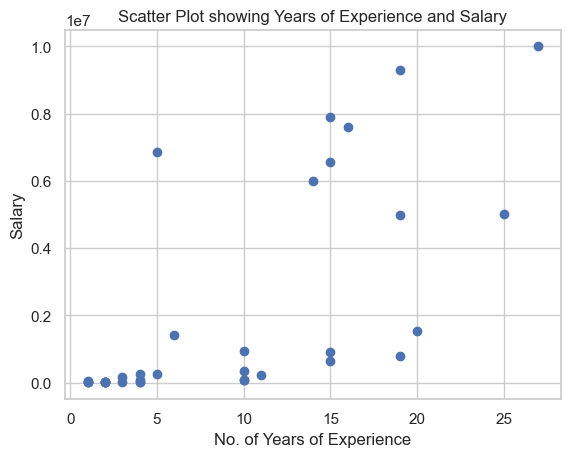

In [37]:
plt.scatter(req_df['Experience_Years'],req_df['Salary'])
plt.xlabel('No. of Years of Experience')
plt.ylabel('Salary')
plt.title('Scatter Plot showing Years of Experience and Salary')
plt.show()

In [38]:
corr=req_df['Experience_Years'].corr(req_df['Salary'])
corr

0.6855999775494617

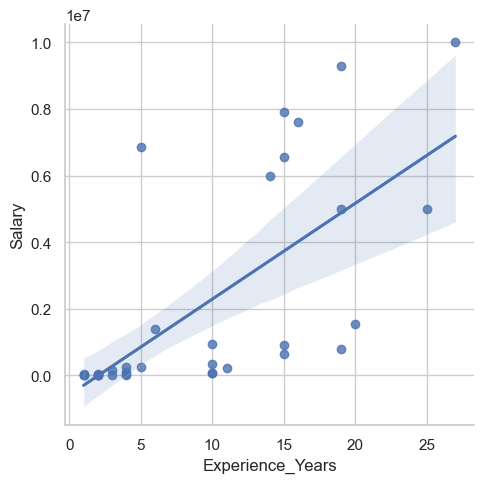

In [39]:
sns.lmplot(x='Experience_Years',y='Salary',data=req_df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

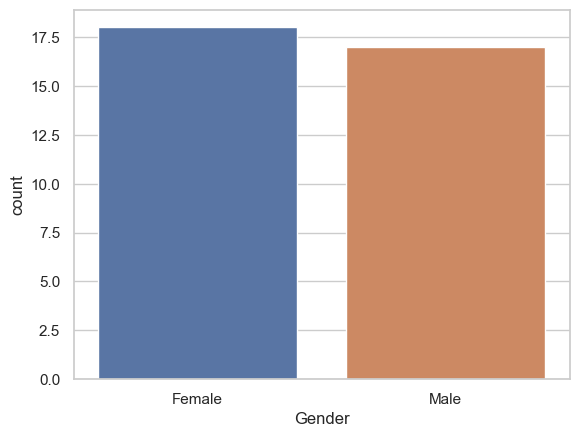

In [40]:
sns.countplot(x='Gender',data=req_df)

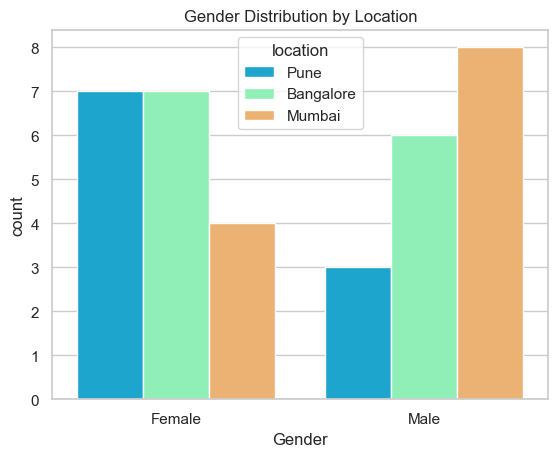

In [41]:
sns.countplot(x='Gender',hue='location',data=df3, palette='rainbow')
plt.title('Gender Distribution by Location')
plt.show()

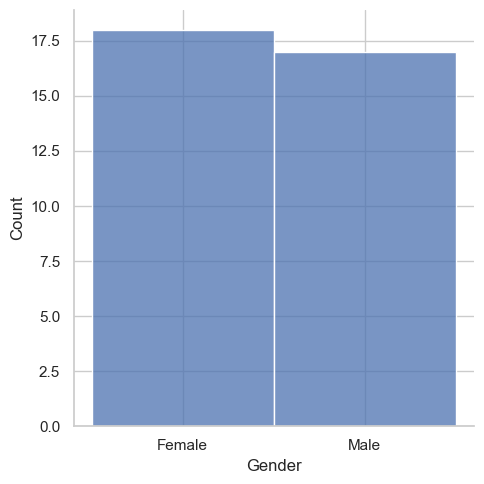

In [42]:
sns.displot(req_df['Gender'])

<AxesSubplot:>

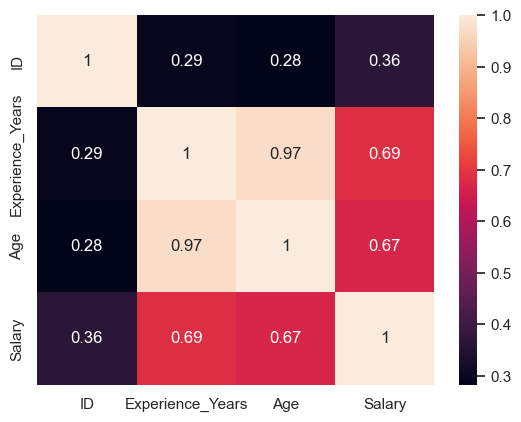

In [43]:
sns.heatmap(df3.corr(),annot=True)

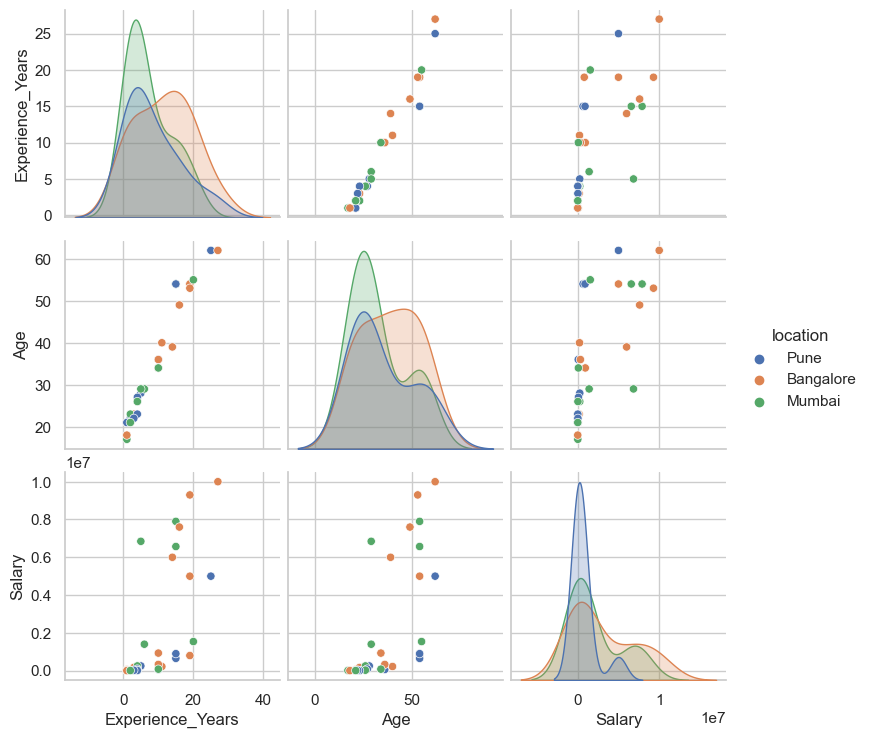

In [44]:
sns.pairplot(df3[['Experience_Years','Age','Salary','location']],hue='location')

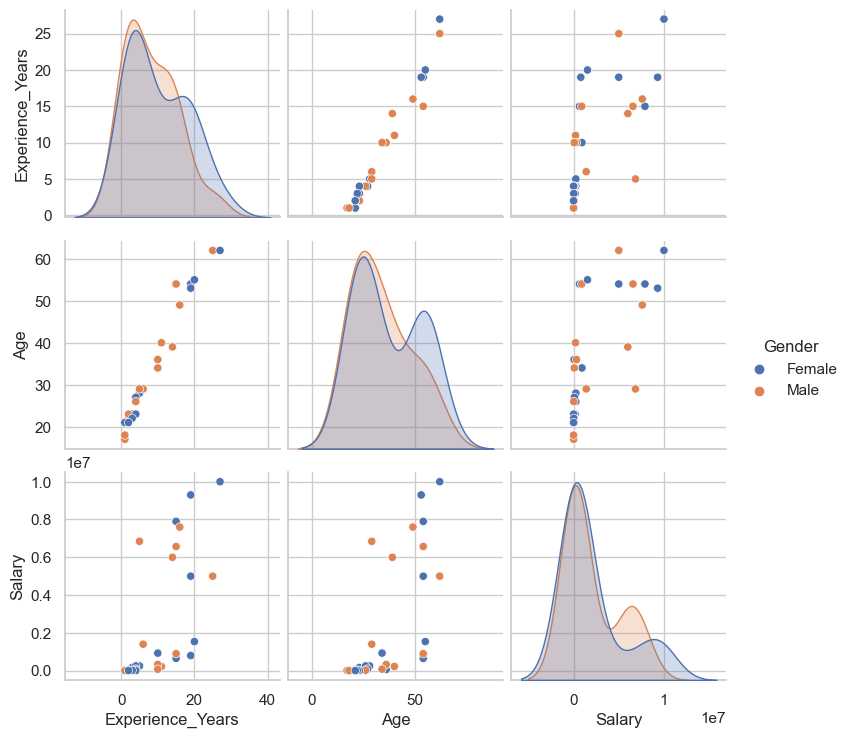

In [45]:
sns.pairplot(df3[['Experience_Years','Age','Salary','Gender']],hue='Gender')

<AxesSubplot:xlabel='Age', ylabel='Experience_Years'>

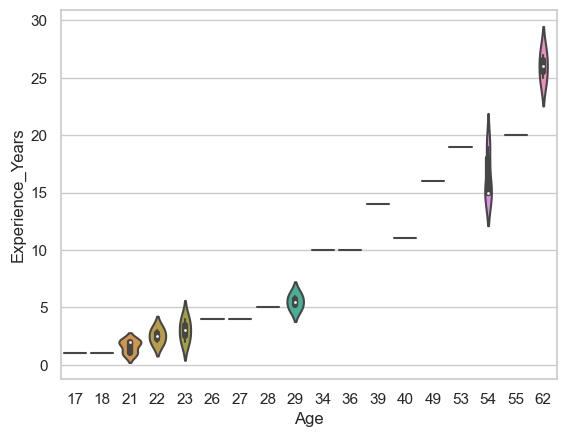

In [46]:
sns.set(style="whitegrid")
sns.violinplot(x="Age",y="Experience_Years",data=df3)

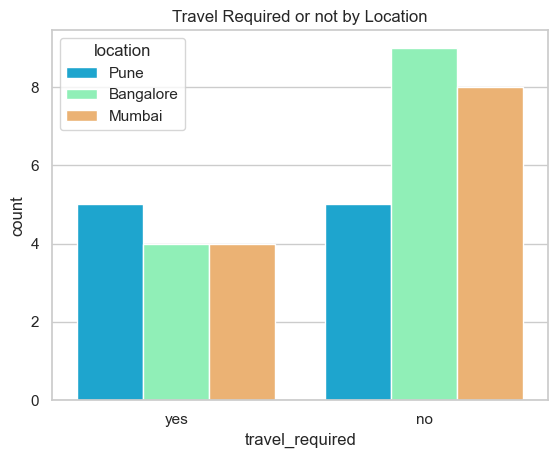

In [47]:
sns.countplot(x='travel_required',hue='location',data=df3, palette='rainbow')
plt.title('Travel Required or not by Location')
plt.show()

# Conclusion

Findings according to the Exploratory Data Analysis:


1. Average Salary of Finance Department: 2165561.11
2. Average Salary of Tech Department: 2077257.14
3. Average Salary of HR Department: 1958208.33
4. Tech Department has the highest number of Employees (14)
5. There are 18 female employees and 16 male employees in the company. The gender distribution can be considered as more or less equal. Except for Mumbai, in other two locations, the number of females is higher than that of males.
6. The correlation between Years of Experience and Salary is 0.69. This means that the features are quite strongly correlated, and this relation can be used to predict salary.
7. The Finance Department has the highest average salary.
8. Age is highly correlated with Salary and Years of Experience.
9. Except in Pune, for the other two cities, more employees don't require travel. The city with highest number of employees who don't require travel is Bangalore.

# Thank You